In [61]:
import pandas as pd
from os.path import exists

pd.set_option('display.float_format', '{:.2f}'.format)

In [26]:
dtypes = {
    "Podskupina": str,
    "Šifra PU": str,
    "Naziv PU": str,
    "Šifra DM": str,
    "Naziv DM": str,
    "Zaposlitve plača": float,
    "Bruto plača": float,
    "Tip C": float,
    "Tip D": float,
    "Tip E": float,
    "Tip F": float,
    "Tip I": float,
    "Tip J": float,
    "Tip O": float,
}

def load_data(year: int) -> pd.DataFrame:
    """Load data from a given year"""

    df = pd.DataFrame()

    for month in range(1, 13):
        filename = f"data/{year}/{year}-{month:02}-DM.csv"
        if not exists(filename):

            continue
        df_month = pd.read_csv(filename, dtype=dtypes, thousands=".", decimal=",")
        df_month["Mesec"] = month
        df_month["Leto"] = year
        df_month['Bruto/osebo'] = df_month['Bruto plača'] / df_month['Zaposlitve plača']
        df = df.append(df_month)

    return df

Vsi zneski so bruto!
Statistika izplacil plac gasilcem. Percentili ne predstavljajo distribucije plac med posamezniki ampak distribucijo skozi mesece! Torej 75% percentil pomeni da je bil vsaj tak znesek izplacan skozi 3/4 leta 2022. 

In [31]:

df = load_data(2022)
df_gasilci = df[df['Naziv DM'].str.contains('GASIL')]
df_gasilci.groupby('Naziv DM')['Bruto/osebo'].describe()

,count,mean,std,min,25%,50%,75%,max
Naziv DM,,,,,,,,
DIREKTOR JAVNEGA ZAVODA GASILSKO REŠEVALNE DEJAVNOSTI,147.00,3797.65,1519.02,2171.00,3005.00,3575.00,4175.50,13010.00
GASILEC,176.00,1694.02,220.03,1092.91,1578.55,1687.42,1830.19,2247.75
GASILEC DISPEČER SPECIALIST,66.00,2199.83,321.60,1715.69,1949.16,2148.36,2399.92,2888.75
GASILEC I,143.00,2037.58,233.86,1335.12,1898.06,2016.44,2179.44,2607.80
GASILSKI INŠTRUKTOR,77.00,2437.55,343.33,1530.00,2230.00,2373.50,2588.20,3628.00
GASILSKI INŠTRUKTOR I,66.00,2796.77,740.24,1403.00,2286.62,2738.50,3063.25,4601.00
GASILSKI INŠTRUKTOR II,22.00,2419.80,262.26,1788.00,2296.75,2500.33,2597.25,2749.00
KANDIDAT ZA GASILCA,44.00,1223.34,315.91,74.50,1087.00,1154.33,1322.38,2142.00
KOORDINATOR ZA GASILSKO PREVENTIVO,10.00,1686.60,560.67,660.00,1502.50,1991.50,2046.75,2085.00


Izplacila gasilcem po nazivu delovnega mesta skozi leto 2022.

<AxesSubplot:xlabel='Mesec'>

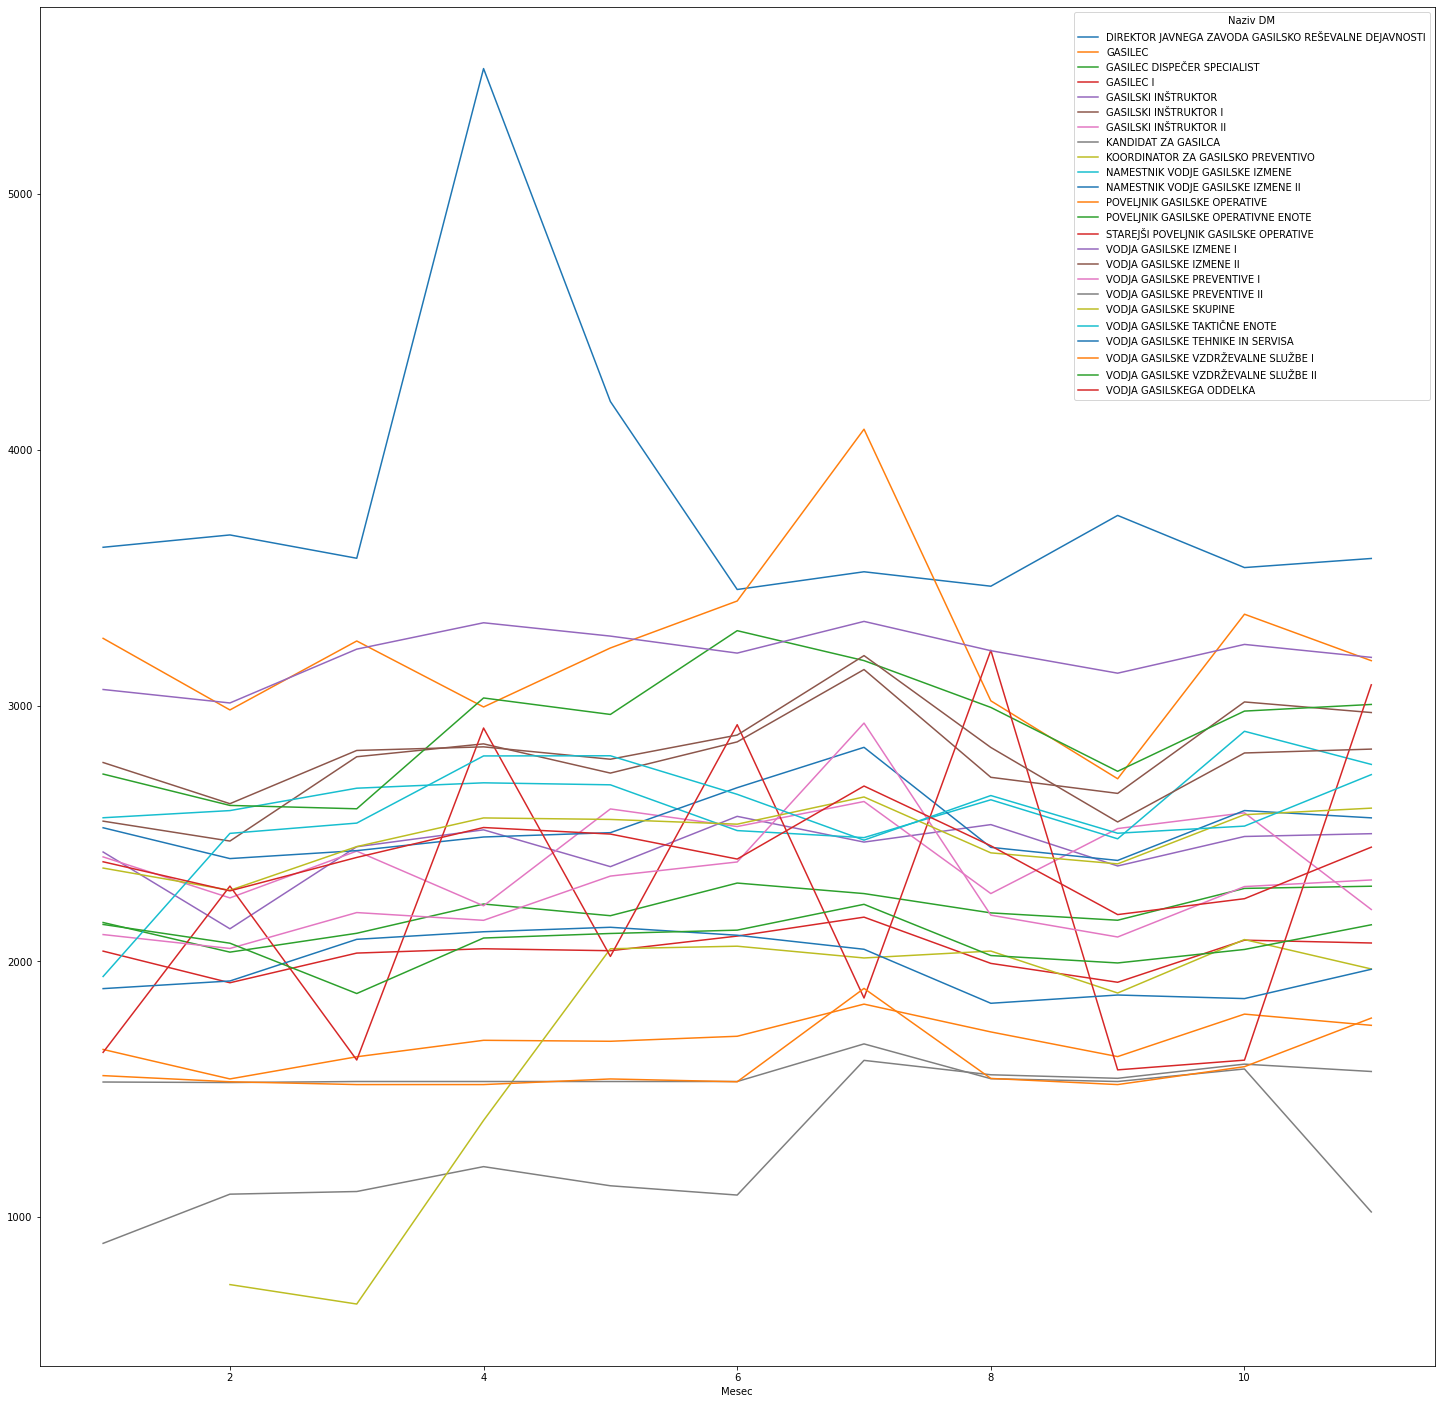

In [55]:
stats = df_gasilci.groupby(['Mesec', 'Naziv DM'])['Bruto/osebo'].mean().to_frame().reset_index()
# df_gasilci.pivot(index='Mesec', columns='Naziv DM', values='Bruto/osebo')
stats.pivot(index='Mesec', columns='Naziv DM', values='Bruto/osebo').plot(figsize=(25, 25))

Izplacila v `GASILSKA BRIGADA LJUBLJANA` skozi leto 2022, po delovnih mestih

Naziv DM,DIREKTOR JAVNEGA ZAVODA GASILSKO REŠEVALNE DEJAVNOSTI,GASILEC,GASILEC DISPEČER SPECIALIST,GASILEC I,GASILSKI INŠTRUKTOR,GASILSKI INŠTRUKTOR I,KANDIDAT ZA GASILCA,POVELJNIK GASILSKE OPERATIVNE ENOTE,STAREJŠI POVELJNIK GASILSKE OPERATIVE,VODJA GASILSKE IZMENE I,VODJA GASILSKE SKUPINE,VODJA GASILSKE TAKTIČNE ENOTE,VODJA GASILSKE TEHNIKE IN SERVISA
Mesec,,,,,,,,,,,,,
1,4276.00,1332.83,1787.24,1335.12,2783.00,1737.00,1295.17,2936.50,383.00,2906.67,1964.53,2054.23,2260.00
2,4276.00,1321.08,1772.58,1399.47,2565.00,1702.00,1154.33,2851.38,NaN,3002.00,1923.10,2104.23,2201.00
3,4991.00,1711.42,2148.29,1862.43,3100.00,2270.00,1154.33,3592.12,316.00,3431.00,2430.10,2601.62,2707.00
4,7171.00,1904.17,2325.29,2050.00,3628.00,2135.00,1154.33,3685.38,NaN,3789.00,2677.20,2789.77,2648.00
5,13010.00,1741.67,2110.34,1676.81,3001.00,2326.00,1154.33,3510.25,1031.00,3424.00,2396.05,2574.08,2585.00
6,5223.00,1693.92,2173.03,1790.50,3032.00,2330.00,1154.33,3595.25,NaN,3371.67,2400.00,2426.62,2738.00
7,4534.00,1474.58,1889.69,1541.79,2539.00,1947.00,1291.83,3241.62,89.00,2872.00,2090.30,2332.38,2259.00
8,4299.00,1948.92,2256.62,1744.57,3369.00,1765.00,1504.67,3244.25,NaN,3789.67,2465.45,2614.08,2209.00
9,5003.00,1700.09,2161.02,1691.50,3084.00,2427.00,1587.17,3481.25,181.00,3457.00,2373.50,2571.38,2302.00


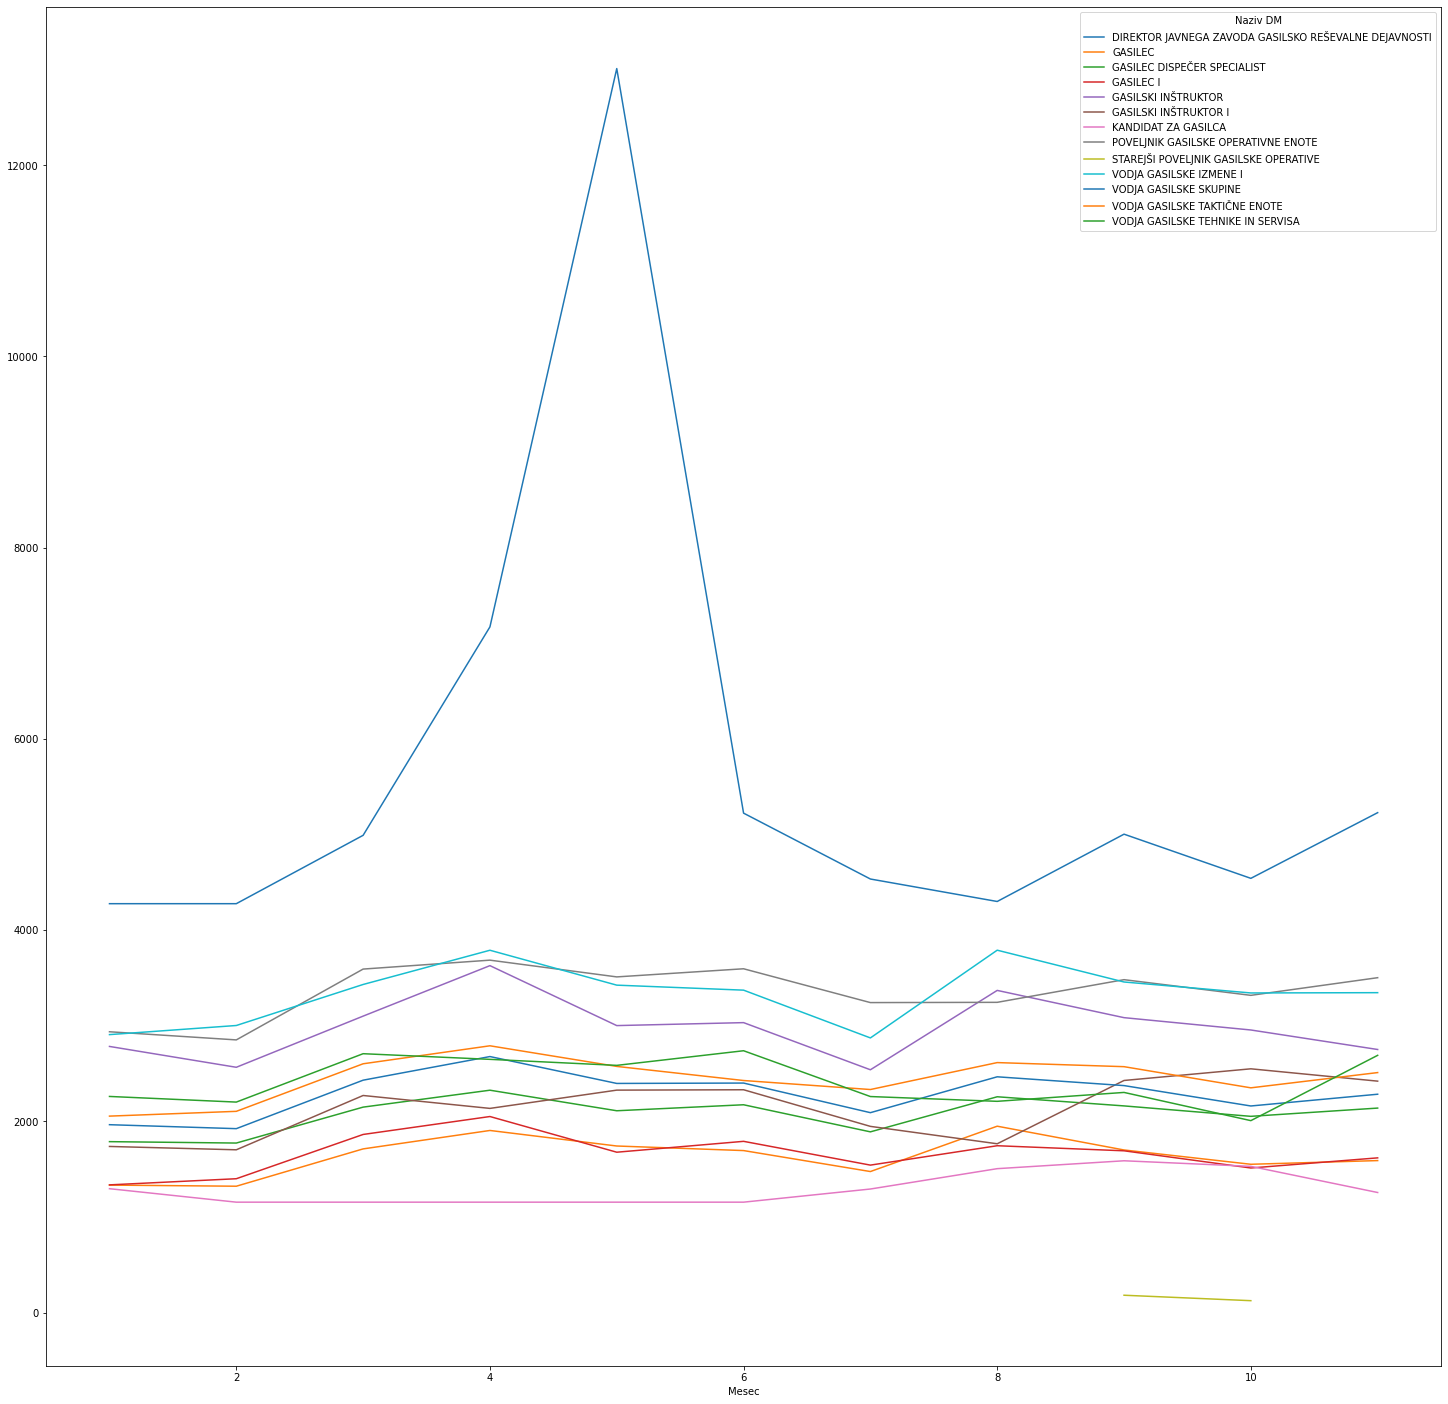

In [63]:
df_gblj = df_gasilci[(df_gasilci['Naziv PU'].str.contains('GASILSKA BRIGADA LJUBLJANA'))]
df_gblj_vodja = df_gblj.pivot(index='Mesec', columns='Naziv DM', values='Bruto/osebo')
df_gblj_vodja.plot(figsize=(25, 25))
df_gblj_vodja

Izplacila direktorjev skozi leto 2022

Naziv PU,CZR DOMŽALE,GASILSKA BRIGADA LJUBLJANA,GASILSKO REŠEVALNA,GASILSKO REŠEVALNA SLUŽBA KRANJ,GASILSKO REŠEVALNI CENTER,GRC Novo mesto (GE),Gasilsko reševalni center,JAVNI ZAVOD,JAVNI ZAVOD GASILSKA,JAVNI ZAVOD ZA GASILSKO IN REŠEVALNO,Javni zavod POKLICNA GASILSKA ENOTA VELENJE,KOROŠKI GASILSKI ZAVOD,POKLICNA GASILSKA ENOTA CELJE,POKLICNA GASILSKA ENOTA KRŠKO,ZAVOD ZA GASILNO RESEVAL.SLUZBO
Mesec,,,,,,,,,,,,,,,
1,3027.00,4276.00,3005.00,3575.00,NaN,3161.00,2373.00,3248.00,6889.00,2993.00,NaN,2400.00,4085.00,4743.00,3268.00
2,4697.00,4276.00,3005.00,3575.00,NaN,3161.00,2373.00,3025.00,6596.00,3008.00,NaN,2400.00,4085.00,4453.00,3016.00
3,3027.00,4991.00,3005.00,4326.00,NaN,3161.00,2373.00,4347.00,4376.00,2993.00,NaN,2400.00,5823.00,2818.00,2845.00
4,3027.00,7171.00,3005.00,5381.00,NaN,5521.00,8391.00,11010.00,4029.00,2993.00,NaN,2400.00,10162.00,3905.00,4379.00
5,3027.00,13010.00,3005.00,3575.00,2433.00,3161.00,NaN,3916.00,4089.00,4663.00,NaN,2400.00,4096.00,3969.00,3108.00
6,3751.00,5223.00,3005.00,3575.00,2373.00,2874.00,NaN,3781.00,4030.00,2993.00,NaN,2400.00,4103.00,3937.00,2852.00
7,3027.00,4534.00,3005.00,4346.00,2355.00,3686.00,NaN,3781.00,4030.00,2993.00,NaN,2857.00,3026.00,4516.00,3642.00
8,3027.00,4299.00,3013.00,3575.00,2373.00,4052.00,NaN,3781.00,4030.00,2993.00,3440.00,2387.00,3942.00,4185.00,3434.00
9,3036.00,5003.00,3014.00,3575.00,2365.00,3161.00,NaN,3789.00,4040.00,7493.00,3440.00,2401.00,4107.00,4060.00,2921.00


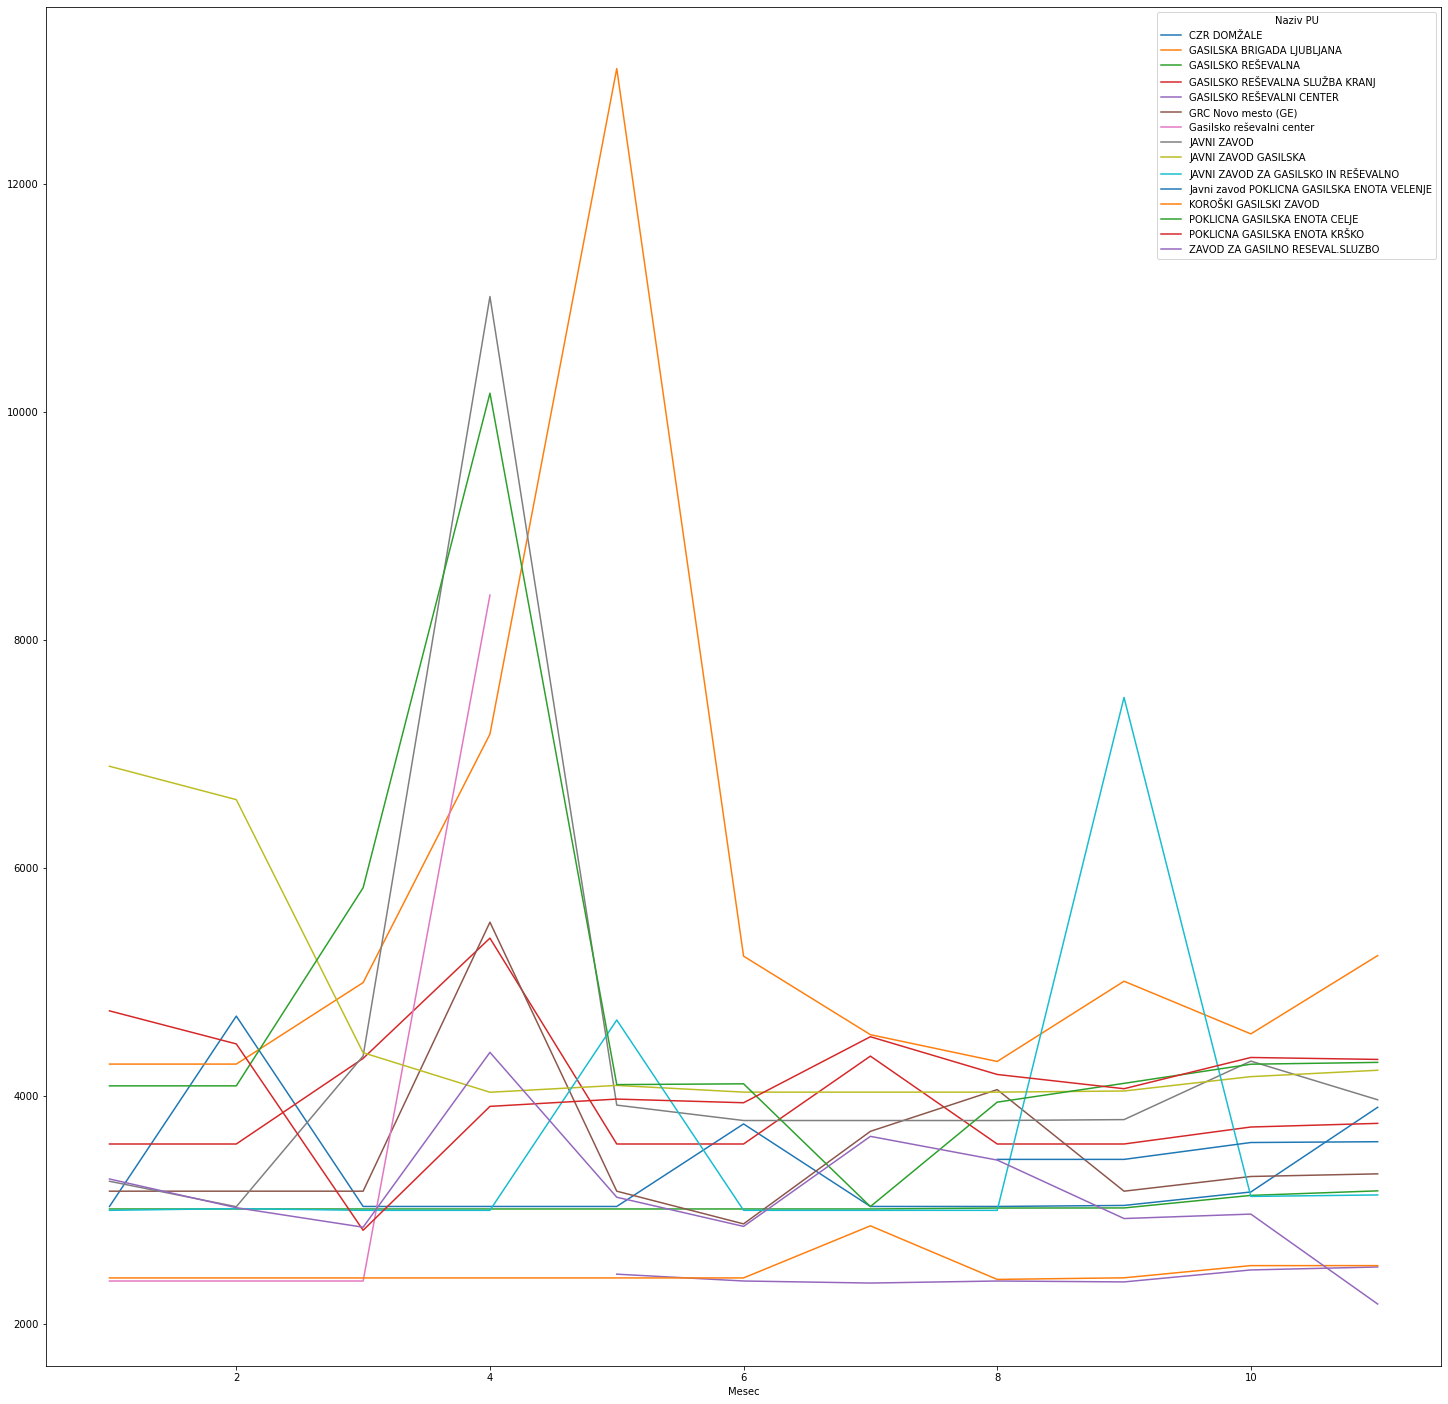

In [68]:
df_dir = df_gasilci[(df_gasilci['Naziv DM'].str.contains('DIREKTOR'))]
df_dir = df_dir.pivot(index='Mesec', columns='Naziv PU', values='Bruto/osebo')
df_dir.plot(figsize=(25, 25))
df_dir